1. Author : Keshav Agrawal
2. Task : Exploratory Data Analysis
3. GRIP @ The Sparks Foundation
4. As a business manager, try to find out the weak areas where you can work to make more profit.

## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading the dataset

In [2]:
df=pd.read_csv("SampleSuperstore.csv")

## Gaining some information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## check the duplicates

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

In [7]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Checking unique values in the columns

In [8]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [9]:
df["Country"].unique()


array(['United States'], dtype=object)

In [10]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [12]:
df.drop(['Country','City','State','Postal Code','Region'],axis=1,inplace=True)

In [13]:
df.head()

,Ship Mode,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Analysis

Text(0, 0.5, 'Profit')

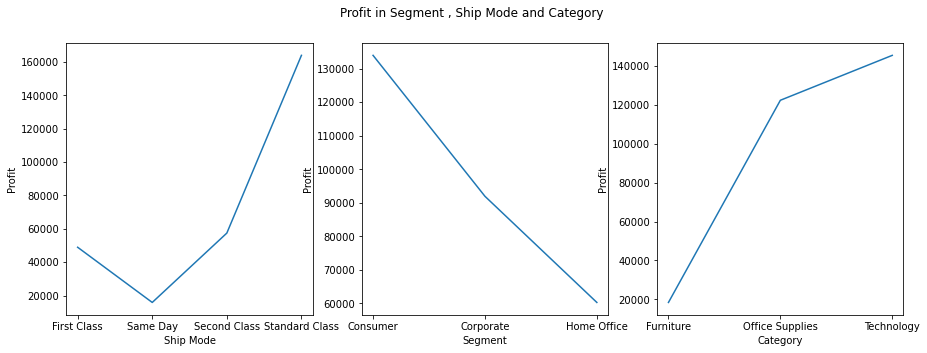

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
fig.suptitle('Profit in Segment , Ship Mode and Category')
y=df.groupby(["Ship Mode"])['Profit'].sum().sort_values(ascending=False)
plot=sns.lineplot(y.index,y.values,ax=axes[0])
plot.set_ylabel('Profit')
y=df.groupby(["Segment"])['Profit'].sum().sort_values(ascending=False)
plot1=sns.lineplot(y.index,y.values,ax=axes[1])
plot1.set_ylabel('Profit')
y=df.groupby(["Category"])['Profit'].sum().sort_values(ascending=False)
plot2=sns.lineplot(y.index,y.values,ax=axes[2])
plot2.set_ylabel('Profit')


Text(0, 0.5, 'Profit')

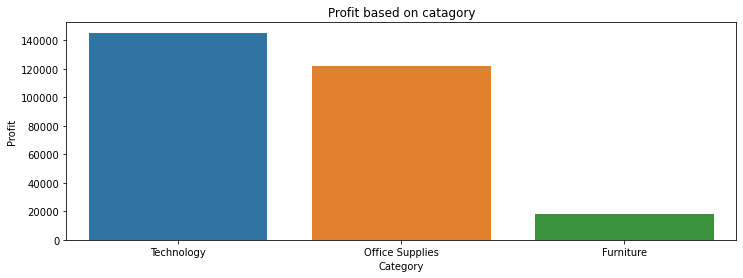

In [15]:
x=df.groupby(['Category'])['Profit'].sum().sort_values(ascending=False)
plt.rcParams['figure.figsize']=12,4

plot=sns.barplot(x.index,x.values)
plot.set_title("Profit based on catagory")
plot.set_ylabel("Profit")

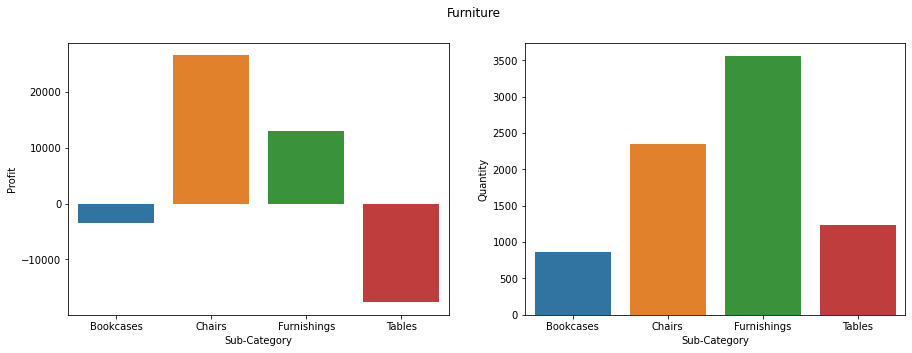

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Furniture')
y=df[df['Category']=='Furniture']
z=y.groupby(['Sub-Category'])['Profit','Quantity'].sum()
#plt.rcParams['figure.figsize']=15,6
sns.barplot(z.index,z.Profit,ax=axes[0])

#plt.show()
sns.barplot(z.index,z.Quantity,ax=axes[1])
plt.show()

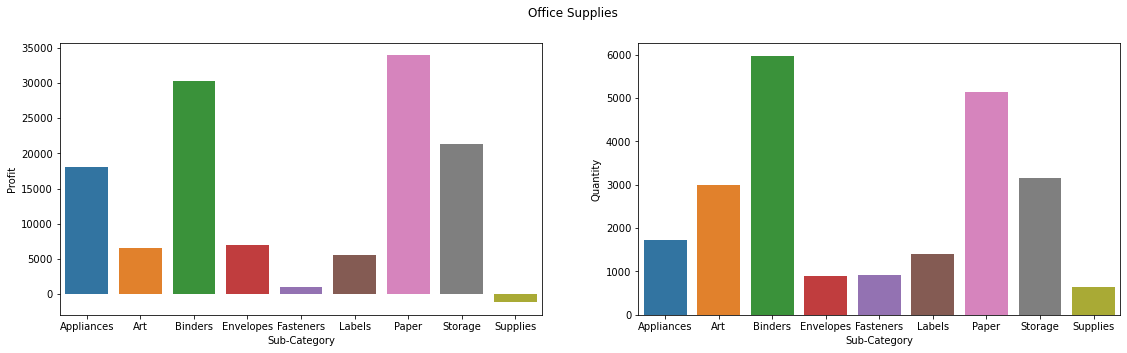

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(19, 5), sharey=False)
fig.suptitle('Office Supplies')
y=df[df['Category']=='Office Supplies']
z=y.groupby(['Sub-Category'])['Profit','Quantity'].sum()
#plt.rcParams['figure.figsize']=15,6
sns.barplot(z.index,z.Profit,ax=axes[0])
#plt.show()
sns.barplot(z.index,z.Quantity,ax=axes[1])
plt.show()

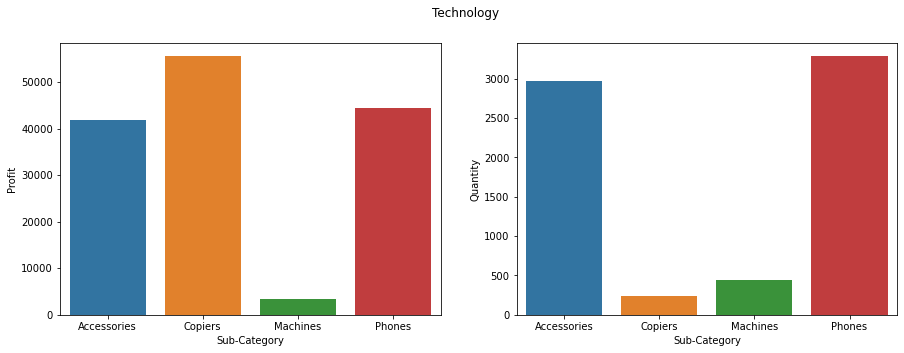

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Technology')
y=df[df['Category']=='Technology']
z=y.groupby(['Sub-Category'])['Profit','Quantity'].sum()
#plt.rcParams['figure.figsize']=15,6


sns.barplot(z.index,z.Profit,ax=axes[0])
#plt.show()
sns.barplot(z.index,z.Quantity,ax=axes[1])
plt.show()

## Conclusions

From the results of the analysis we get to know that 

1. Maximum profit is from Standard class segment in consumer ship mode and in technology catagory
2. The owner should should impore his same day sales.
3. In Furniture his maximum sales is of furnishing goods but earn max profit from chairs , while he is suffereing the loss in tables catagory
4. In office supplies he does not suffer any loss, overall performance is good in Supplies sector
5. In technology he earns the maximum profit


Overall:
    Give more attention towards furniture catagory